# Import Telemetry class


In [1]:
%matplotlib widget
from TMclass import *
import datetime
fromiso = datetime.datetime.fromisoformat
tdelta = datetime.timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xml.etree import ElementTree
import os





Leggo il csv come (t,fcp,id), in cui id ha un certo numero di entrate. Creo PHI dal primo orario - 1 giorno o lo creo a mano

In [2]:
from xml.etree.ElementTree import ParseError
import glob

def IORread(ZIPfile):

    class XML:
        VALUE = 'value'
        ACTION_TIME = 'actionTime'
        RELEASE_TIME = 'releaseTime'
        NAME = 'name'
        SEQUENCE_END = '</sequence>'
        SEQUENCE_START = '<sequence'
        COMMAND_END = '</command>'
        COMMAND_START = '<command '
        DESCRIPTION = 'description'


    def decode_line(line_string):
        if XML.SEQUENCE_START not in line_string and XML.COMMAND_START not in line_string:
            return line_string#, previous_time
        # print(f'Decoding line {line_string}')
        xml_node = ElementTree.fromstring(line_string)
        command = xml_node.get(XML.NAME)
        action_time = next(xml_node.iter(XML.ACTION_TIME)).text
        
        args = []
        for i, arg_node in enumerate(xml_node.iter(XML.VALUE)):
            if arg_node.text is None:
                print(f'Parameter {i} as no value in command {command} at {action_time}')
            args.append(arg_node.text or '')
        
        return action_time,command,args
        
    

    fmt = '%Y-%jT%H:%M:%SZ'
    dur = pd.read_csv('/home/calchetti/Desktop/phi_proc_time.lst')
    
    # open the zip and read the IOR
    # importing required modules 
    from zipfile import ZipFile 
    
    # specifying the zip file name 
    # ZIPfile = "./IORG_SPHI_S299__00001.ZIP"
    dirOut = ZIPfile.split('.ZIP')[0]+'/'

    # opening the zip file in READ mode 
    with ZipFile(ZIPfile, 'r') as zip: 
        # printing all the contents of the zip file 
        # zip.printdir() 
        # print('Extracting all the files now...') 
        zip.extractall(dirOut) 
        # print('Done!') 
    
    files = sorted(glob.glob(dirOut+'*.SOL'))
    df = []

    for fileName in files:
        print(fileName.split('/')[-1])
        with open(fileName) as f:
            lines = f.readlines()
        

        lines = [line.strip() for line in lines]
        result = []
        rows = {}
        count = 0
        for i, line in enumerate(lines):
            if len(result) > 0 and len(result[-1][0]):
                if (XML.SEQUENCE_START in result[-1][0] and XML.SEQUENCE_END not in result[-1][0]) or \
                (XML.COMMAND_START in result[-1][0] and XML.COMMAND_END not in result[-1][0]):
                        result[-1] = (result[-1][0] + line, result[-1][1])
                        continue
                line_string, line_number = result[-1]
                try:
                    # print(line_string)
                    out = decode_line(line_string)
                    if type(out) == tuple:
                        action_time,command,args = out
                        if 'AIPF' in command:
                            command = 'FCP-'+command.split('AIPF')[1]
                            if command[-1] == 'A':
                                command = command[:-1]
                            
                            duration = dur[dur.filename.str.contains(command)].duration
                            if duration.size>1:
                                duration = duration.iloc[0]
                            try:
                                duration = float(duration)
                            except:
                                try:
                                    temp = duration.values[0]
                                except:
                                    temp = str(duration)
                                for j,p in enumerate(args):
                                    try:
                                        temp = temp.replace('$FP_'+str(j+1),p)
                                    except:
                                        pass
                                duration = eval(temp)
                            
                            start_time = datetime.datetime.strptime(action_time,fmt)
                            rows[str(count)] = (start_time,start_time+datetime.timedelta(seconds=int(duration)),command,args)
                            
                            count += 1
                        
                except ParseError as e:
                    print(line_string)
                    raise ParseError(e)
            result.append((line, i))

        cols = ['start','end','fcp','parameters']
        
        df += [pd.DataFrame.from_dict(rows,'index',columns=cols)]
    
    df = pd.concat(df,ignore_index=True)
    return df

zip_files = sorted(glob.glob('/home/calchetti/MPStemp/PHI_TMtool/IORs/*.ZIP'))
df = []
for z in zip_files:
    df += [IORread(z)]
df = pd.concat(df,ignore_index=True)
df = df.sort_values('start')
df = df.reset_index(drop=True)


IOR_S_S192F01_SPHI_V03.SOL
IOR_S_S192F02_SPHI_V03.SOL
IOR_S_S192F03_SPHI_V03.SOL
IOR_S_S192F04_SPHI_V03.SOL
IOR_S_S192F05_SPHI_V03.SOL
IOR_S_S192F06_SPHI_V03.SOL
IOR_S_S192F07_SPHI_V03.SOL
IOR_S_S192F08_SPHI_V03.SOL
IOR_S_S192F09_SPHI_V03.SOL
IOR_S_S192F10_SPHI_V03.SOL
IOR_S_S192F11_SPHI_V03.SOL
IOR_S_S192F12_SPHI_V03.SOL
IOR_S_S193F01_SPHI_V01.SOL
IOR_S_S193F02_SPHI_V01.SOL
IOR_S_S193F03_SPHI_V01.SOL
IOR_S_S193F04_SPHI_V01.SOL
IOR_S_S193F05_SPHI_V01.SOL
IOR_S_S194F01_SPHI_V01.SOL
IOR_S_S194F02_SPHI_V01.SOL
IOR_S_S194F03_SPHI_V01.SOL
IOR_S_S194F04_SPHI_V01.SOL
IOR_S_S194F05_SPHI_V01.SOL
IOR_S_S194F06_SPHI_V01.SOL
IOR_S_S195F01_SPHI_V01.SOL
IOR_S_S195F02_SPHI_V01.SOL
IOR_S_S195F03_SPHI_V01.SOL
IOR_S_S195F04_SPHI_V01.SOL
IOR_S_S195F05_SPHI_V01.SOL
IOR_S_S195F06_SPHI_V01.SOL
IOR_S_S195F07_SPHI_V01.SOL
IOR_S_S196F01_SPHI_V03.SOL
IOR_S_S196F02_SPHI_V03.SOL
IOR_S_S196F03_SPHI_V03.SOL
IOR_S_S196F04_SPHI_V03.SOL
IOR_S_S196F05_SPHI_V03.SOL
IOR_S_S196F06_SPHI_V03.SOL
IOR_S_S196F07_SPHI_V03.SOL
I

In [71]:
def levels_did_out(phi_mode):
    def find_levels(s):
        levels = []
        t = []
        
        for k, v in s.__dict__.items():
            if k in ['raw','crop','bin','pack','extr','proc','compr']:
                t += [getattr(s,k)]
                levels += [t[-1].level]
        return levels, t

    levels = []
    temp = [[]]
    temp[0] += [phi_mode]
    i = 0
    while temp[i] != []:
        i += 1
        temp += [[]]
        for t in temp[i-1]:
            l,tt = find_levels(t); levels += l; temp[i] += tt;
        
    # temp = temp[:-1]
    temp = [t for tt in temp[1:] for t in tt]
    return levels, [t.did for t in temp], [t.n_datasets for t in temp]
    
def find_consecutive(obs,did):
    did_int = int(did)
    keys = list(obs.keys()); keys = [i for i in keys if 'copy' not in i]
    start_did = np.asarray(keys,dtype=int)

    n_datasets = np.asarray([obs[k].raw.n_datasets for k in keys],dtype=int)

    cond = start_did - (did_int) + n_datasets == 0
    obs_i = np.where(cond)[0]

    if len(obs_i) == 1:
        obs_i = obs_i[0]; 
        return keys[obs_i]
    elif len(obs_i) > 1:
        print(f'more observations found with this possible consecutive DID: {did}')

def find_did(obs,did,crop = 500,end='\n'):
    keys = list(obs.keys()); keys = [i for i in keys if 'copy' not in i]
    levels = []
    dids = []
    n_datasets = []
    for i,k in enumerate(keys):
        out = levels_did_out(obs[k])
        levels += [[]]
        dids += [[]]
        n_datasets += [[]]
        levels[i] += out[0]
        dids[i] += out[1]
        n_datasets[i] += [max(out[2])]*len(out[2])
        
    all_levels = np.asarray([t for tt in levels for t in tt])
    all_dids = np.asarray([t for tt in dids for t in tt],dtype=int)
    n_datasets = np.asarray([t for tt in n_datasets for t in tt],dtype=int)
    
    # n_datasets = np.asarray([obs[k].raw.n_datasets for k in keys],dtype=int)
    did_int = int(did)
    
    cond1 = all_dids - (did_int) <= 0
    cond2 = all_dids - (did_int) + n_datasets > 0
    # obs_i,obs_j = np.where(cond1*cond2)
    obs_i = np.where(cond1*cond2)[0]
    if obs_i.size == 0:
        return did, None, None, False
    else:
        idx = obs_i[0]
    
    # if np.all(all_levels[obs_i] == all_levels[idx]):
    level = all_levels[idx]
    lev = level
    i = 0
    while lev != 'raw':
        i+=1
        lev = all_levels[idx-i]
    
    start_did = str(all_dids[idx-i]).rjust(10,'0')
    # endif
    lev = obs[start_did].level_out(level)
    
    return start_did,level,lev,True

def run(df,PHI,verbose=False):
    import sys
    import traceback

    obs = {}
    ysize = 2048
    xsize = 2048
    instr = 'HRT'
    id = 1
    nout = {'HRT':5, 'FDT':5}
    nbits = {'HRT':6, 'FDT':6}
    compression = False

    for i in range(df.shape[0]):
        try:

            fcp = df.iloc[i].fcp

            # FPS window is restored only when we leave observation mode
            if fcp == 'FCP-002':#
                ysize = 2048
            if fcp == 'FCP-011':#
                ysize = 2048
            if fcp == 'FCP-032':#
                ysize = 2048
            if fcp == 'FCP-033':#
                ysize = 2048
            if fcp == 'FCP-034':#
                ysize = 2048
            if fcp == 'FCP-035':#
                ysize = 2048
            if fcp == 'FCP-036':#
                ysize = 2048
            if fcp == 'FCP-037':#
                ysize = 2048
            if fcp == 'FCP-038':#
                ysize = 2048
            if fcp == 'FCP-039':#
                ysize = 2048
            if fcp == 'FCP-040':#
                ysize = 2048
            if fcp == 'FCP-041':#
                ysize = 2048
            if fcp == 'FCP-042':#
                ysize = 2048
            if fcp == 'FCP-043':#
                ysize = 2048
            
            if fcp == 'FCP-214':#Enable_Science_Data_Compression.fcp :
                compression = True

            if fcp == 'FCP-215':#Disable_Science_Data_Compression.fcp
                compression = False

            if fcp == 'FCP-216':#Schedule_Datasets.fcp
                if df.iloc[i+1].fcp != 'FCP-219': #to avoid low latency
                    t0 = df.iloc[i].start.to_pydatetime()
                    t1 = df.iloc[i].end.to_pydatetime()
                    n = 1
                    j = 0
                    while df.iloc[i].parameters[j] != '0':
                        did = df.iloc[i].parameters[j].rjust(10,'0')
                        try:
                            obs_i, level, lev, find = find_did(obs,did,end='\r')
                            if find:
                                if compression: #to distinguish between compressed and uncompressed flushes
                                    kw = obs[obs_i].compressing(t0,ndata=n,nbits=nbits[obs[obs_i].mode],level=level,verbose=verbose)
                                    if nbits[obs[obs_i].mode] < 6:
                                        print(did,'compressed at',nbits[obs[obs_i].mode],'bits. index:',i)
                                else:
                                    print('uncompressed flush of',did,'index:',i)
                                    kw = obs[obs_i].compressing(t0,ndata=n,nbits=32,level=level,verbose=verbose)
                                PHI.saving(id,**kw)
                            else:
                                print('DID to be flushed not found: '+did,'index:',i)
                        except:
                            print('DID to be flushed not found: '+did,'index:',i)
                            
                        j += 1

            if fcp == 'FCP-217':#Schedule_Consecutive_Datasets.fcp
                if df.iloc[i+1].fcp != 'FCP-219': #to avoid low latency
                    did = df.iloc[i].parameters[0].rjust(10,'0')
                    t0 = df.iloc[i].start.to_pydatetime()
                    t1 = df.iloc[i].end.to_pydatetime()
                    n = int(df.iloc[i].parameters[1])
                    obs_i, level, lev, find = find_did(obs,did,end='\r')
                    if find:
                        if compression: #to distinguish between compressed and uncompressed flushes
                            kw = obs[obs_i].compressing(t0,ndata=n,nbits=nbits[obs[obs_i].mode],level=level,verbose=verbose)
                            if nbits[obs[obs_i].mode] < 6:
                                print(did,'compressed at',nbits[obs[obs_i].mode],'bits. index:',i)
                        else:
                            print('uncompressed flush of',did,'index:',i)
                            kw = obs[obs_i].compressing(t0,ndata=n,nbits=32,level=level,verbose=verbose)
                        PHI.saving(id,**kw)
                    else:
                        print('DID to be flushed not found: '+did,'index:',i)

            if fcp == 'FCP-401':#Prepare_FDT.fcp
                instr = 'FDT'
            
            if fcp == 'FCP-402':#Prepare_HRT.fcp
                instr = 'HRT'
            
            if fcp == 'FCP-405':#Set_Context_for_MTL_Reentry.fcp
                nout = {'HRT':5, 'FDT':5}
                if int(df.iloc[i].parameters[11]) < 30:
                    nout['HRT'] = 5
                elif int(df.iloc[i].parameters[11]) >= 30 and int(df.iloc[i].parameters[11]) < 40:
                    nout['HRT'] = 3
                else:
                    nout['HRT'] = 2
                
                if int(df.iloc[i].parameters[25]) < 30:
                    nout['FDT'] = 5
                elif int(df.iloc[i].parameters[25]) >= 30 and int(df.iloc[i].parameters[25]) < 40:
                    nout['FDT'] = 3
                else:
                    nout['FDT'] = 2

                nbits['HRT'] = int(df.iloc[i].parameters[13])
                nbits['FDT'] = int(df.iloc[i].parameters[27])
                
            if fcp == 'FCP-412':#Delete_Datasets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = int(df.iloc[i].parameters[1])
                obs_i, level, lev, find = find_did(obs,did,end='\r')
                if find:
                    mem = lev.data_tot / lev.n_datasets * n
                    if '.' in level:
                        key = level.split('.')[-1]
                    else:
                        key = level
                    kw = {'tm_type':type(lev), 'val':-mem,\
                    'key':key, 'start':t0, 'end':t1}
                    PHI.saving(id,**kw)
                else:
                    print('DID to be deleted not found: '+did,'index:',i)
            
            if fcp == 'FCP-451':#Set_HRT_calibration_context.fcp
                nbits['HRT'] = int(df.iloc[i].parameters[7])
                if int(df.iloc[i].parameters[5]) < 30:
                    nout['HRT'] = 5
                elif int(df.iloc[i].parameters[5]) >= 30 and int(df.iloc[i].parameters[5]) < 40:
                    nout['HRT'] = 3
                else:
                    nout['HRT'] = 2
                
            if fcp == 'FCP-453':#Set_FDT_calibration_context.fcp
                nbits['FDT'] = int(df.iloc[i].parameters[7])
                if int(df.iloc[i].parameters[5]) < 30:
                    nout['FDT'] = 5
                elif int(df.iloc[i].parameters[5]) >= 30 and int(df.iloc[i].parameters[5]) < 40:
                    nout['FDT'] = 3
                else:
                    nout['FDT'] = 2
                
            if fcp == 'FCP-467':#Set_FPA_Window.fcp
                ysize = (int(df.iloc[i].parameters[1]) + 2 - int(df.iloc[i].parameters[0])) * 2

            if fcp == 'FCP-514':#Acquire_CTC_Image.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 1/6
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(128,128,1,1),did=obs_i) #TBD
                except:
                    obs[did] = PHI_MODE('HRT')
                    kw = obs[did].observation(t0,n,cad,(128,128,1,1),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-521':#Acquire_FDT_Flat_Field_Images.fcp
                did = df.iloc[i].parameters[2].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 9
                cad = 2
                fdt_flat = PHI_MODE(instr)
                kw = fdt_flat.observation(t0,n,cad,(2048,2048,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-522':#Process_FDT_Flat_Field_Images.fcp
                did = df.iloc[i].parameters[2].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = ((t1 - t0)/n).total_seconds()/60
                obs[did] = PHI_MODE(instr)
                kw = obs[did].observation(t0,t1,cad,(2048,2048,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-523':#Acquire_HRT_Flat_Field_Images.fcp
                did = df.iloc[i].parameters[1].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 50
                obs[did] = PHI_MODE(instr)
                kw = obs[did].observation(t0,n,cad,(2048,2048,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-524':#Process_HRT_Flat_Field_Images.fcp
                did = df.iloc[i].parameters[2].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = ((t1 - t0)/n).total_seconds()/60
                obs[did] = PHI_MODE(instr)
                kw = obs[did].observation(t0,t1,cad,(2048,2048,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-525':#Acquire_HRT_Flat_Field_Images_for_KLL.fcp
                did = df.iloc[i].parameters[2].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 9
                cad = 2
                obs[did] = PHI_MODE(instr)
                kw = obs[did].observation(t0,n,cad,(2048,2048,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-526':#Process_HRT_Flat_Field_Images_for_KLL.fcp
                did = df.iloc[i].parameters[4].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = ((t1 - t0)/n).total_seconds()/60
                obs[did] = PHI_MODE(instr)
                kw = obs[did].observation(t0,t1,cad,(2048,2048,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-561':#Perform_FPA_Focus_Scan.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                obs[did] = PHI_MODE(instr)
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                N = int(df.iloc[i].parameters[1])
                cad = ((t1 - t0)/1).total_seconds()/60
                kw = obs[did].observation(t0,t1,cad,(2048,2048,1,N),did=did)
                PHI.saving(id,**kw)
            
            if fcp == 'FCP-571':#Perform_Wavelength_Scan.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 5
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,1,20),did=obs_i) #TBD
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,1,20),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-581':#Calibrate_PMP.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 2
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,1,20),did=obs_i) #TBD
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,4,12),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-592':#Calculate_FPA_Dark_Image.fcp
                did = df.iloc[i].parameters[3].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 2
                cad = 100/60
                obs[did] = PHI_MODE(instr)
                kw = obs[did].observation(t0,n,cad,(ysize,xsize,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-593':#Acquire_FPA_Exposure_Time_Images.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 4
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,1,20),did=obs_i) #TBD
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,1,20),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-595':#Acquire_FPA_PSF_Images.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = ((t1 - t0)/n).total_seconds()/60
                obs[did] = PHI_MODE(instr)
                if t0 < fromiso('2023-02-01T00:00:00'):
                    kw = obs[did].observation(t0,t1,cad,(2048,2048,1,2),did=did)
                else:
                    kw = obs[did].observation(t0,t1,cad,(2048,2048,1,5),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048
            
            if fcp == 'FCP-601':#Acquire_Single_Dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 1
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,4,6),did=obs_i)
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,4,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-602':#Acquire_Single_Image.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 1
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,1,1),did=obs_i)
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,1,1),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-603':#Acquire_No_Pol_Dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = 1
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,1,6),did=obs_i)
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,1,6),did=did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-604':#Acquire_Many_No_Pol_Sets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = int(df.iloc[i].parameters[1])
                cad = int(df.iloc[i].parameters[3])/60
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,1,6),did=obs_i)
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,1,6),did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-605':#Acquire_Many_Datasets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = int(df.iloc[i].parameters[1])
                cad = int(df.iloc[i].parameters[3])/60
                try:
                    obs_i = find_consecutive(obs,did)
                    kw = obs[obs_i].observation(t0,n,cad,(ysize,xsize,4,6),did=obs_i)
                except:
                    obs[did] = PHI_MODE(instr)
                    kw = obs[did].observation(t0,n,cad,(ysize,xsize,4,6),did)
                PHI.saving(id,**kw)
                # xsize = 2048

            if fcp == 'FCP-703':#Process_Dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                partialStore = int(df.iloc[i].parameters[2])
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                
                obs_i, level, lev, find = find_did(obs,did,end='\r')
                if find:
                    kw = obs[obs_i].processing(t0,ndata=n,nout=nout[obs[obs_i].mode],partialStore=partialStore,
                                    level=level,did=str(int(did) + 7000).rjust(10,'0'),verbose=verbose)
                    PHI.saving(id,**kw)
                else:
                    print('DID to be processed not found: '+did,'index:',i)
            
            if fcp == 'FCP-704':#Pack_Dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                obs_i, level, lev, find = find_did(obs,did,end='\r')
                if find:
                    kw = obs[obs_i].packing(t0,ndata=n,level=level,did=str(int(did) + 40000000).rjust(10,'0'),verbose=verbose)
                    PHI.saving(id,**kw)
                else:
                    print('DID to be packed not found: '+did,'index:',i)

            if fcp == 'FCP-705':#Extract_Image.fcp
                did = df.iloc[i].parameters[1].rjust(10,'0')
                new_did = df.iloc[i].parameters[2].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                cad = (t1-t0).total_seconds()/60
                obs_i, level, lev, find = find_did(obs,did,end='\r')
                if find:
                    kw = obs[obs_i].extract(t0,level,did=new_did)
                    PHI.saving(id,**kw)
                else:
                    print('DID to be extracted not found: '+did,'index:',i)
            
            if fcp == 'FCP-706':#Crop_dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                new_did = df.iloc[i].parameters[1].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                diff = int(new_did) - int(did)
                crop = [int(df.iloc[i].parameters[5]) - int(df.iloc[i].parameters[4]) + 1, int(df.iloc[i].parameters[3]) - int(df.iloc[i].parameters[2]) +1]
                obs_i, level, lev, find = find_did(obs,did,diff)
                if find:
                    kw = obs[obs_i].cropping(t0,crop=crop,ndata=n,level=level,did=new_did,verbose=verbose)
                    PHI.saving(id,**kw)
                else:
                    print('DID to be cropped not found: '+did,'index:',i)

            if fcp == 'FCP-707':#Bin_dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                if did[:4] == '0000':
                    pass
                else:
                    new_did = df.iloc[i].parameters[1].rjust(10,'0')
                    binn = int(df.iloc[i].parameters[2])
                    t0 = df.iloc[i].start.to_pydatetime()
                    # print(t0,i)
                    t1 = df.iloc[i].end.to_pydatetime()
                    obs_i, level, lev, find = find_did(obs,did)
                    if find:
                        n = 1
                        kw = obs[obs_i].binning(t0,binn,ndata=n,level=level,did=new_did,verbose=verbose)
                        PHI.saving(id,**kw)
                    else:
                        print('DID to be binned not found: '+did,'index:',i)

            if fcp == 'FCP-709' or fcp == 'FCP-709B':#Pack_Many_Datasets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = int(df.iloc[i].parameters[1])
                step = int(df.iloc[i].parameters[2])
                if step == 1:
                    obs_i, level, lev, find = find_did(obs,did,end='\r')
                    if find:
                        kw = obs[obs_i].packing(t0,n,level=level,verbose=verbose)
                        PHI.saving(id,**kw)
                    else:
                        print('DID to be packed not found: '+did,'index:',i)
                else:
                    old_did = did
                    for i in range(n):
                        did = str(int(old_did)+i*step).rjust(10,'0')
                        obs_i, level, lev, find = find_did(obs,did,end='\r')
                        if find:
                            kw = obs[obs_i].packing(t0,1,level=level,verbose=verbose)
                            PHI.saving(id,**kw)
                        else:
                            print('DID to be packed not found: '+did,'index:',i)
                        
            if fcp == 'FCP-710' or fcp == 'FCP-710B':#Crop_many_datasets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                new_did = df.iloc[i].parameters[3].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = int(df.iloc[i].parameters[1])
                diff = int(new_did) - int(did)
                crop = [int(df.iloc[i].parameters[7]) - int(df.iloc[i].parameters[6]) + 1, int(df.iloc[i].parameters[5]) - int(df.iloc[i].parameters[4]) +1] # [y,x], given as x,y in FCP
                obs_i, level, lev, find = find_did(obs,did,diff)
                if find:
                    kw = obs[obs_i].cropping(t0,crop=crop,ndata=n,level=level,did=new_did,verbose=verbose)
                    PHI.saving(id,**kw)
                else:
                    print('DID to be cropped not found: '+did,'index:',i)

            if fcp == 'FCP-711':#Average_Many_Datasets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                new_did = df.iloc[i].parameters[3].rjust(10,'0')
                n = int(df.iloc[i].parameters[1])
                cad = (6+45*n)/60
                diff = int(new_did) - int(did)
                obs_i, level, lev, find = find_did(obs,did,diff)
                if find:
                    ysize = obs[obs_i].raw.Y
                    xsize = obs[obs_i].raw.X
                    P = obs[obs_i].raw.P
                    L = obs[obs_i].raw.L
                    try:
                        obs_i = find_consecutive(obs,new_did)
                        kw = obs[obs_i].observation(t0,1,cad,(ysize,xsize,P,L),did=obs_i)
                    except:
                        obs[new_did] = PHI_MODE(instr)
                        kw = obs[new_did].observation(t0,1,cad,(ysize,xsize,P,L),did=new_did)
                else:
                    print('DID to be cropped not found: '+did,'index:',i)

            if fcp == 'FCP-713':#Crop_Pack_dataset.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                new_did = df.iloc[i].parameters[1].rjust(10,'0')
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = 1
                diff = int(new_did) - int(did)
                crop = [int(df.iloc[i].parameters[5]) - int(df.iloc[i].parameters[4]) + 1, int(df.iloc[i].parameters[3]) - int(df.iloc[i].parameters[2]) +1]
                obs_i, level, lev, find = find_did(obs,did,diff)
                if find:
                    kw = obs[obs_i].cropping(t0,crop=crop,ndata=n,level=level,verbose=verbose)
                    kw = obs[obs_i].packing(kw['end'],ndata=n,level=level+'.crop',did=new_did,verbose=verbose)
                    PHI.saving(id,**kw)
                else:
                    print('DID to be cropped not found: '+did,'index:',i)
            
            if fcp == 'FCP-714' or fcp == 'FCP-714B':#Crop_Pack_many_datasets.fcp
                did = df.iloc[i].parameters[0].rjust(10,'0')
                new_did = df.iloc[i].parameters[3].rjust(10,'0')
                step = int(df.iloc[i].parameters[2])
                t0 = df.iloc[i].start.to_pydatetime()
                t1 = df.iloc[i].end.to_pydatetime()
                n = int(df.iloc[i].parameters[1])
                diff = int(new_did) - int(did)
                crop = [int(df.iloc[i].parameters[7]) - int(df.iloc[i].parameters[6]) + 1, int(df.iloc[i].parameters[5]) - int(df.iloc[i].parameters[4]) +1]
                if step == 1:
                    obs_i, level, lev, find = find_did(obs,did,diff,end='\r')
                    if find:
                        kw = obs[obs_i].cropping(t0,crop=crop,ndata=n,level=level,verbose=verbose)
                        kw = obs[obs_i].packing(kw['end'],ndata=n,level=level+'.crop',did=new_did,verbose=verbose)
                        PHI.saving(id,**kw)
                    else:
                        print('DID to be cropped not found: '+did,'index:',i)
                else:
                    old_did = did
                    first_new_did = new_did
                    for i in range(n):
                        did = str(int(old_did)+i*step).rjust(10,'0')
                        new_did = str(int(first_new_did)+i*step).rjust(10,'0')
                        obs_i, level, lev, find = find_did(obs,did,diff,end='\r')
                        if find:
                            kw = obs[obs_i].cropping(t0,crop=crop,ndata=1,level=level,verbose=verbose)
                            kw = obs[obs_i].packing(kw['end'],ndata=1,level=level+'.crop',did=new_did,verbose=verbose)
                            PHI.saving(id,**kw)
                        else:
                            print('DID to be packed not found: '+did,'index:',i)
            
            if fcp == 'FCP-903':#Select_Partitions.fcp
                id = int(df.iloc[i].parameters[0])

            if fcp == 'FCP-904':#Copy_Dataset.fcp
                id = int(df.iloc[i].parameters[0])
                new_id = int(df.iloc[i].parameters[3])
                did = df.iloc[i].parameters[1].rjust(10,'0')
                if did[:4] == '0000':
                    pass
                else:
                    new_did = df.iloc[i].parameters[2].rjust(10,'0')
                    t0 = df.iloc[i].start.to_pydatetime()
                    t1 = df.iloc[i].end.to_pydatetime()
                    n = 1
                    diff = int(new_did) - int(did)
                    obs_i, level, lev, find = find_did(obs,did,diff)
                    if find:
                        # obs['copy_'+new_did] = PHI_MODE(obs[obs_i].mode)
                        kw = {'tm_type':type(lev), 'val':(lev.data+lev.metadata)/lev.this_run,\
                              'key':level.split('.')[-1], 'start':t0, 'end':t1}
                        # kw = obs['copy_'+new_did].observation(t0,1,5,(obs[did].raw.Y,obs[did].raw.Y,obs[did].raw.P,obs[did].raw.L))
                        PHI.saving(new_id,**kw)
                    else:
                        print('DID to be copied not found: '+did,'index:',i)
            
            if fcp == 'FCP-980':#Format_NANDFS_Partition.fcp
                t0 = df.iloc[i].start.to_pydatetime()
                PHI.format_partition(int(df.iloc[i].parameters[0]),t0)
        except:
            print(f"Unexpected {sys.exc_info()[1]}, {type(sys.exc_info()[1])}")
            print('index:',i)
            return PHI, obs
    return PHI, obs




In [72]:
PHI = PHI_MEMORY(fromiso('2022-03-05T00:00:00'))

PHI, obs = run(df.iloc[:],PHI,False)

DID to be packed not found: 0202280501 index: 24
DID to be flushed not found: 0242280501 index: 27
DID to be flushed not found: 0222251001 index: 280
uncompressed flush of 0263220050 index: 1094
uncompressed flush of 0223221001 index: 1094
DID to be deleted not found: 0204073101 index: 2475
DID to be flushed not found: 0249130501 index: 8934
DID to be flushed not found: 0210087601 index: 10274
uncompressed flush of 0230151001 index: 11139
DID to be flushed not found: 0250160813 index: 11189
DID to be flushed not found: 0250160814 index: 11189
DID to be flushed not found: 0250160815 index: 11189
DID to be flushed not found: 0250160816 index: 11189
DID to be flushed not found: 0250160817 index: 11189
DID to be flushed not found: 0250160818 index: 11189
DID to be flushed not found: 0250160819 index: 11189
DID to be flushed not found: 0250160820 index: 11189
DID to be flushed not found: 0250160821 index: 11189
DID to be flushed not found: 0250160822 index: 11189
DID to be flushed not found

/home/calchetti/MPStemp/PHI_TMtool/TMclass.py:1210: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axi.plot_date(x,c,color='orange',linestyle='-',marker='<',label='compressed')


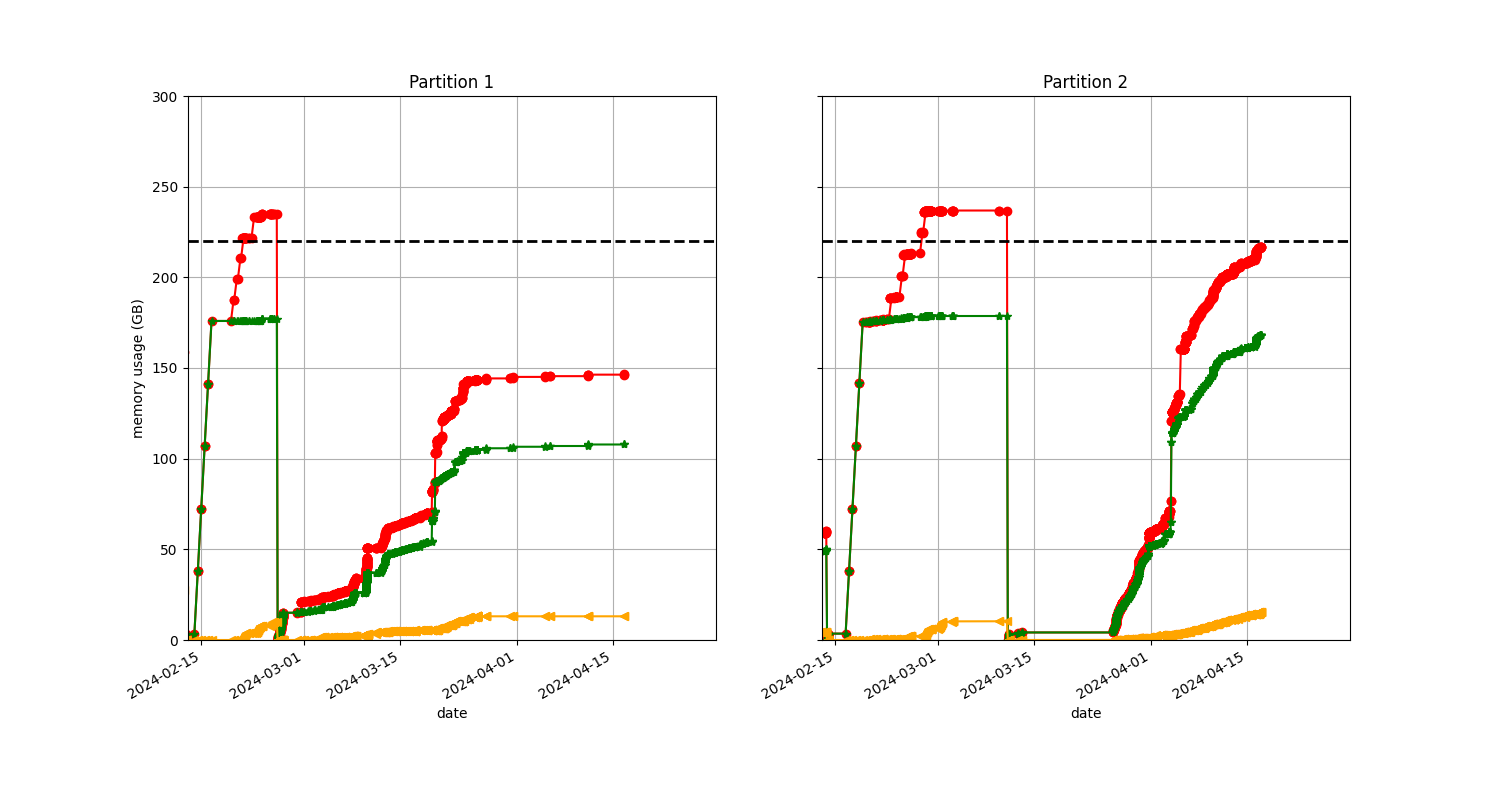

In [73]:
plot_tot(PHI,ylim=(0,300),time_ord=True,xlim=(datetime.datetime(2024,2,13),datetime.datetime(2024,4,30)))

In [6]:
np.where(PHI.part2.history['start'] == datetime.datetime(2023,7,31,2,3,26))
np.sum(PHI.part2.history['compr'][2808:2858])
# PHI.part2.history['start'][2857]


539.5574911999998

In [9]:
temp = PHI.part1.history
s = np.argsort(temp['start'])


y0 = np.asarray(temp['occu'])[s]
y1 = np.asarray(temp['occu'])[s]

x = [None]*(len(y0)+len(y1))
o = [None]*(len(y0)+len(y1))
r = [None]*(len(y0)+len(y1))
c = [None]*(len(y0)+len(y1))

x[::2] = np.asarray(temp['start'])[s]
x[1::2] = np.asarray(temp['end'])[s]; del x[1]
o[::2] = np.cumsum(y0)/1e3
o[1::2] = np.cumsum(y1)/1e3; del o[-1]
r[::2] = np.cumsum(np.asarray(temp['raw'])[s])/1e3
r[1::2] = np.cumsum(np.asarray(temp['raw'])[s])/1e3; del r[-1]
c[::2] = np.cumsum(np.asarray(temp['compr'])[s])/1e3
c[1::2] = np.cumsum(np.asarray(temp['compr'])[s])/1e3; del c[-1]
del y0, y1

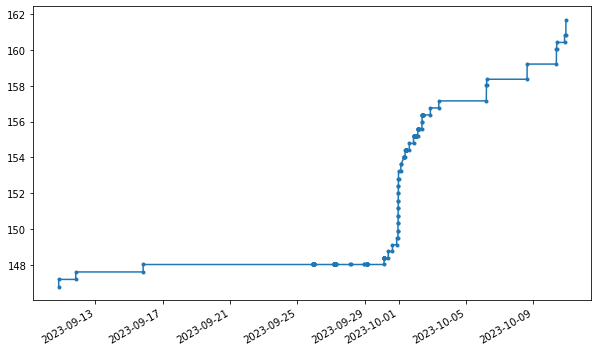

In [34]:
i = 4541#4547
fig = plt.figure(figsize=(10,6))
plt.plot(x[i:],r[i:],'.-'); 
fig.autofmt_xdate()

In [2]:
def simul_syn(cad = [4,4,4,4,4,4,4,4,4], bits = 6, outputs = 24, meta = 0.5):
    """
    1408: 04.26 - 05.01. 6d

    1280: 05.02 - 05.14. 13d

    1024: 05.15 - 05.23. 9d

    896: 05.24. - 06.15. 23d

    768: 06.16. - 08.05. 51d

    896: 08.06. - 08.25. 20d

    1024: 08:26. - 09.05. 11d

    1280: 09.06. - 09.17. 12d

    1408: 09.18. - 09.23. 6d (from 5 to 6, changed by DC to add the whole conjunction, TBC by JH)

    1536: 09.24. - 09.28. 5d (added by DC to add the whole conjunction, TBC by JH)

    """

    crop = [1408,1280,1024,896,768,896,1024,1280,1408,1536]
    duration = [6,13,9,23,51,20,11,12,6,5]

    cad = np.asarray(cad); crop = np.asarray(crop); duration = np.asarray(duration)
    telemetry = duration * cad * (outputs * crop**2 * bits /8e6 + meta)

    print(f"{crop[0]}: 04.26. - 05.01. {duration[0]}d: {cad[0]} datasets/day")
    print(f"{crop[1]}: 05.02. - 05.14. {duration[1]}d: {cad[1]} datasets/day")
    print(f"{crop[2]}: 05.15. - 05.23. {duration[2]}d: {cad[2]} datasets/day")
    print(f"{crop[3]}: 05.24. - 06.15. {duration[3]}d: {cad[3]} datasets/day")
    print(f"{crop[4]}: 06.16. - 08.05. {duration[4]}d: {cad[4]} datasets/day")
    print(f"{crop[5]}: 08.06. - 08.25. {duration[5]}d: {cad[5]} datasets/day")
    print(f"{crop[6]}: 08:26. - 09.05. {duration[6]}d: {cad[6]} datasets/day")
    print(f"{crop[7]}: 09.06. - 09.17. {duration[7]}d: {cad[7]} datasets/day")
    print(f"{crop[8]}: 09.18. - 09.23. {duration[8]}d: {cad[8]} datasets/day")
    print(f"{crop[9]}: 09.24. - 09.28. {duration[9]}d: {cad[9]} datasets/day")

    print('telemetry for each cropping run:',np.round(telemetry,1),'MB')
    print('total telemetry:',np.round(telemetry.sum(),1),'MB')
    # return telemetry


# simul_syn([2,2,2,4,4,4,4,4,4,4])
simul_syn([4,4,4,4,4,4,4,4,4,4])

1408: 04.26. - 05.01. 6d: 4 datasets/day
1280: 05.02. - 05.14. 13d: 4 datasets/day
1024: 05.15. - 05.23. 9d: 4 datasets/day
896: 05.24. - 06.15. 23d: 4 datasets/day
768: 06.16. - 08.05. 51d: 4 datasets/day
896: 08.06. - 08.25. 20d: 4 datasets/day
1024: 08:26. - 09.05. 11d: 4 datasets/day
1280: 09.06. - 09.17. 12d: 4 datasets/day
1408: 09.18. - 09.23. 6d: 4 datasets/day
1536: 09.24. - 09.28. 5d: 4 datasets/day
telemetry for each cropping run: [ 868.4 1559.5  697.5 1375.5 2267.8 1196.1  852.5 1439.6  868.4  859.3] MB
total telemetry: 11984.6 MB


In [58]:
cc = [2048,1920,1792,1664,1536,1408,1280,1152,1024,896,768,640,512]
for c in cc:
    a = PHI_MODE('HRT')
    a.observation(datetime.datetime(2023,1,1,0,0,0),1,1,(2048,2048,4,6))
    a.cropping(a.raw.end,[c,c],1,'raw')
    a.compressing(a.raw.crop.end,6,1,'raw.crop')
    print(c,'x',str(c)+':',round(a.raw.crop.compr.data_tot,1),'MB,',round(a.raw.crop.compr.data_tot*1e6/2**20,1),'MiB')


2048 x 2048: 76.1 MB, 72.6 MiB
1920 x 1920: 66.9 MB, 63.8 MiB
1792 x 1792: 58.3 MB, 55.6 MiB
1664 x 1664: 50.3 MB, 48.0 MiB
1536 x 1536: 42.9 MB, 40.9 MiB
1408 x 1408: 36.0 MB, 34.4 MiB
1280 x 1280: 29.8 MB, 28.4 MiB
1152 x 1152: 24.2 MB, 23.0 MiB
1024 x 1024: 19.1 MB, 18.2 MiB
896 x 896: 14.7 MB, 14.0 MiB
768 x 768: 10.8 MB, 10.3 MiB
640 x 640: 7.5 MB, 7.2 MiB
512 x 512: 4.9 MB, 4.6 MiB


In [3]:
12000/(6+13+9+23+51+20+11+12+6+5)

76.92307692307692

In [106]:
out[2].X*out[2].Y*out[2].P*out[2].L*6/8/2**20 + 0.01 #out[2].compr.metadata/out[2].compr.this_run*1e6/2**20


40.51

In [20]:
obs['0303220101'].raw.pack.compr.data/obs['0303220101'].raw.pack.compr.this_run
obs['0303220101'].raw.pack.compr.__dict__

{'level': 'raw.pack.compr',
 'did': '0343220101',
 'cadence': 1,
 'start': datetime.datetime(2023, 3, 28, 0, 8),
 'n_datasets': 21,
 'end': datetime.datetime(2023, 3, 28, 2, 8, 48, 621312),
 'n_bits': 6,
 'X': 2048,
 'Y': 2048,
 'P': 4,
 'L': 6,
 'n_pix': 100663296,
 'n_outputs': 24,
 'this_run': 12,
 'metadata': 0.10799999999999998,
 'data': 905.969664,
 'data_tot': 1585.635912,
 'not_datasets': 4,
 'interm_data_tot': 0,
 'time': datetime.timedelta(seconds=12685, microseconds=87296),
 'cpu_time': datetime.timedelta(seconds=7248, microseconds=621312)}

In [129]:
# df.iloc[18802]
# obs['0303220001'].raw.crop.pack.start
# levels_did_out(obs['0323211500'])

In [20]:
PHI.part2.history['compr']

[0,
 0,
 0,
 0,
 679.558248,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 75.506472,
 75.506472,
 75.506472,
 75.506472,
 75.506472,
 75.506472,
 6.3004560000000005,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 453.03883199999996,
 254.85796799999997,
 755.0647200000001,
 755.0647200000001,
 377.53236000000004,
 377.53236000000004,
 254.85796799999997,
 42.476327999999995,
 755.0647200000001,
 528.545304,
 302.025888,
 302.025888,
 42.476327999999995,
 302.025888,
 679.558248,
 42.476327999999995,
 226.51941599999998,
 254.85796799999997,
 755.3347200000001,
 755.3347200000001,
 566.50104,
 188.83368000000002,
 424.76327999999995,
 254.85796799999997,
 -10790.524176,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 75.5064

In [36]:
obs['0302090001'].raw.X

2048

In [46]:
df.iloc[13429]
# obs['0203240250']
# obs['025104001']
# find_did(obs,'0251040501')

start    2022-12-15 02:22:24
end      2022-12-15 02:28:24
fcp                  FCP-709
FP_1              0232150111
FP_2                       4
FP_3                       1
FP_4                        
FP_5                        
FP_6                        
FP_7                        
FP_8                        
FP_9                        
FP_10                       
FP_11                       
FP_12                       
FP_13                       
FP_14                       
FP_15                       
FP_16                       
FP_17                       
FP_18                       
FP_19                       
FP_20                       
FP_21                       
FP_22                       
FP_23                       
FP_24                       
FP_25                       
FP_26                       
FP_27                       
FP_28                       
FP_29                       
FP_30                       
FP_31                       
FP_32         

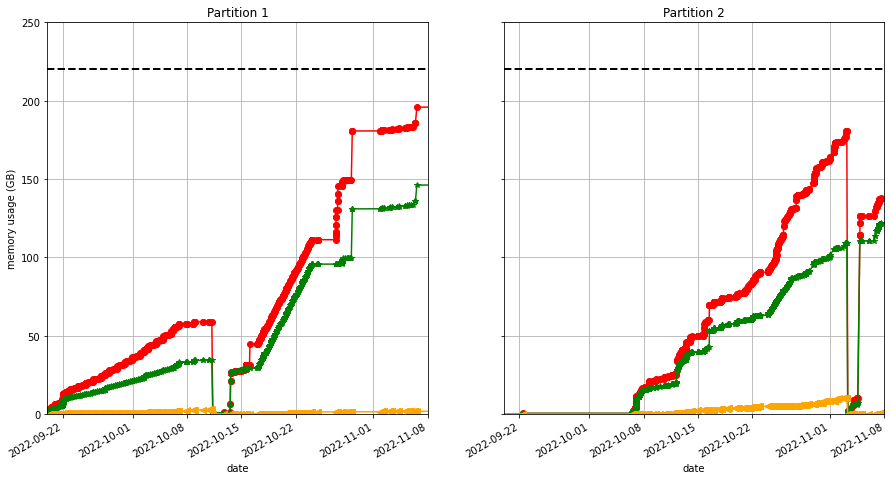

In [6]:
plot_tot(PHI,ylim=(0,250),xlim=(datetime.datetime(2022,9,20),datetime.datetime(2022,11,8)))

In [17]:
np.where(np.asarray(PHI.part1.history['raw'])<0,)
PHI.part2.history['start'][-1]
# PHI.part1.history['start'][1054]
# PHI.part2.history['start'][-1]
# PHI.part1.history['start'][-1]

datetime.datetime(2022, 9, 22, 10, 37, 10)

In [28]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# idx1 = find_nearest(PHI.part1.history['start'],datetime.datetime(2022, 4, 8, 0, 0))
# idx2 = find_nearest(PHI.part2.history['start'],datetime.datetime(2022, 4, 8, 0, 0))
# print((PHI.part1.compr+PHI.part2.compr)*1e6/2**20)

# idx1 = find_nearest(PHI.part1.history['start'],datetime.datetime(2022, 4, 8, 0, 0))
df.query('start == "2022-10-12 22:49:42"')

,start,end,fcp,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,...,FP_26,FP_27,FP_28,FP_29,FP_30,FP_31,FP_32,FP_33,FP_34,FP_35
10467,2022-10-12 22:49:42,2022-10-12 22:51:42,FCP-704,0210120403,,,,,,,...,,,,,,,,,,


In [56]:
a = obs['0210120001']
hasattr(a,'raw')
import inspect
for i in inspect.getmembers(a.raw):
     
    # to remove private and protected
    # functions
    if not i[0].startswith('_'):

        
        # To remove other methods that
        # doesnot start with a underscore
        if not inspect.ismethod(i[1]):
            print(i)

('L', 6)
('P', 4)
('X', 2048)
('Y', 2048)
('cadence', 1.6666666666666667)
('crop', <TMclass.CROP object at 0x7f198556d5b0>)
('data', 408)
('data_tot', 1248)
('end', datetime.datetime(2022, 10, 12, 22, 31, 40))
('metadata', 8)
('n_bits', 32)
('n_datasets', 3)
('n_outputs', 24)
('n_pix', 100663296)
('pack', <TMclass.PACK object at 0x7f198556d1f0>)
('start', datetime.datetime(2022, 10, 12, 22, 30))
('this_run', 1)


(19297.0, 19324.0)

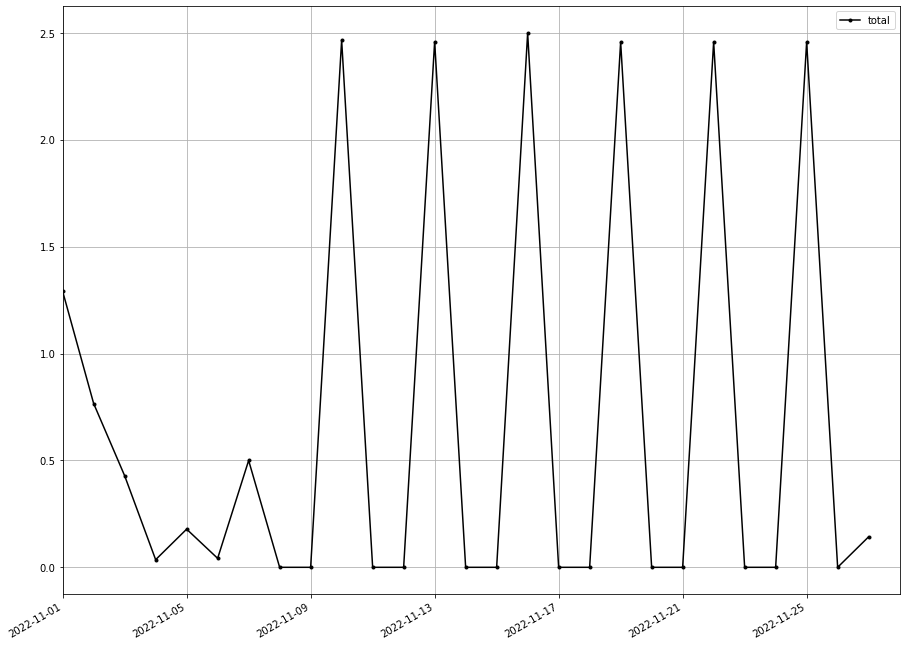

In [7]:
temp = PHI.part1.history    # plt.subplot(121)
c1 = np.asarray(PHI.part1.history['compr'])
c2 = np.asarray(PHI.part2.history['compr'])

d1 = np.asarray(PHI.part1.history['start'])
d2 = np.asarray(PHI.part2.history['start'])

starttime = min(d1[0],d2[0])
endtime = max(d1[-1],d2[-1])
t0 = starttime
times = []
while starttime.date() <= endtime.date():
    times.append(starttime.date())
    starttime += datetime.timedelta(days=1)
starttime = t0; del t0
times_float = [(t - d1[0]).total_seconds() for t in d1]
times = np.asarray(times)

newc1 = np.zeros(np.size(times))
for i,j in zip(d1,c1):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc1[ind] += j/1e3
newc1 = np.asarray(newc1)

newc2 = np.zeros(np.size(times))
for i,j in zip(d2,c2):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc2[ind] += j/1e3
newc2 = np.asarray(newc2)


plt.figure(figsize=(15,12))
# plt.plot_date(times,newc1,color='blue',linestyle='-',marker='.',label='partition 1')
# plt.plot_date(times,newc2,color='red',linestyle='-',marker='.',label='partition 2')
plt.plot_date(times,newc1+newc2,color='black',linestyle='-',marker='.',label='total')
plt.gcf().autofmt_xdate()
plt.grid()
plt.legend()
plt.xlim(datetime.datetime(2022,11,1),datetime.datetime(2022,11,28))
